# CWN general aspect figure

In [3]:
import paths

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from caryocar.models import CoworkingNetwork

%matplotlib inline

In [5]:
recs = [
    ( ['col1','col2','col3'], 'sp1'),
    ( ['col3','col1','col2'], 'sp2'),
    ( ['col1','col3'], 'sp3'),
    ( ['col5','col4'], 'sp3'),
    ( ['col5','col2'], 'sp3'),
    ( ['col5','col6'], 'sp5'),
    ( ['col5','col7'], 'sp4'),
    ( ['col6','col7'], 'sp6'),
    ( ['col6','col7'], 'sp7'),
    ( ['col4','col8','col9'], 'sp4'),
    ( ['col4','col9','col8'],'sp5'),
    ( ['col10'],'sp6'),
    ( ['col10'],'sp6')
]

In [6]:
cliques,spp = zip(*recs)

In [7]:
cwn = CoworkingNetwork(cliques=cliques,taxons=spp)

{'col1': Text(0.409854,0.192586,'col1'),
 'col10': Text(-0.299755,1,'col10'),
 'col2': Text(0.286914,0.0253918,'col2'),
 'col3': Text(0.486967,0.0868863,'col3'),
 'col4': Text(-0.25266,-0.149741,'col4'),
 'col5': Text(0.0501768,-0.163167,'col5'),
 'col6': Text(0.170859,-0.327739,'col6'),
 'col7': Text(0.0497685,-0.36575,'col7'),
 'col8': Text(-0.449735,-0.0842192,'col8'),
 'col9': Text(-0.45239,-0.214248,'col9')}

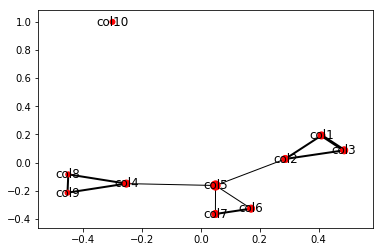

In [8]:
pos = nx.layout.fruchterman_reingold_layout(cwn)

nodes,nodes_counts = zip(*cwn.nodes(data='count'))
u,v,edges_counts = zip(*cwn.edges(data='count'))
edges = list(zip(u,v))

nx.draw_networkx_nodes(cwn, pos, nodes, [5*(1+w**2) for w in nodes_counts] )
nx.draw_networkx_edges(cwn, pos, edges, [1*(0+w**1) for w in edges_counts])
nx.draw_networkx_labels(cwn,pos)

In [9]:
cwn.edges(data=True)

EdgeDataView([('col1', 'col3', {'count': 3, 'taxons': ['sp1', 'sp2', 'sp3'], 'weight_hyperbolic': 2.0}), ('col1', 'col2', {'count': 2, 'taxons': ['sp1', 'sp2'], 'weight_hyperbolic': 1.0}), ('col3', 'col2', {'count': 2, 'taxons': ['sp1', 'sp2'], 'weight_hyperbolic': 1.0}), ('col2', 'col5', {'count': 1, 'taxons': ['sp3'], 'weight_hyperbolic': 1.0}), ('col4', 'col5', {'count': 1, 'taxons': ['sp3'], 'weight_hyperbolic': 1.0}), ('col4', 'col8', {'count': 2, 'taxons': ['sp4', 'sp5'], 'weight_hyperbolic': 1.0}), ('col4', 'col9', {'count': 2, 'taxons': ['sp4', 'sp5'], 'weight_hyperbolic': 1.0}), ('col5', 'col6', {'count': 1, 'taxons': ['sp5'], 'weight_hyperbolic': 1.0}), ('col5', 'col7', {'count': 1, 'taxons': ['sp4'], 'weight_hyperbolic': 1.0}), ('col6', 'col7', {'count': 2, 'taxons': ['sp6', 'sp7'], 'weight_hyperbolic': 2.0}), ('col8', 'col9', {'count': 2, 'taxons': ['sp4', 'sp5'], 'weight_hyperbolic': 1.0})])

In [10]:
nx.set_edge_attributes(cwn,values='None',name='taxons')

In [11]:
nx.write_gexf(cwn,'./cwn.gexf')

In [12]:
m = nx.adj_matrix(cwn,weight='count').todense().tolist()

In [13]:
t=""
for i,row in enumerate(m):
    t+="col"+str(i+1)+" & "
    for j,el in enumerate(row):
        t+=str(el)+ (" & " if j<len(m)-1 else "\\\\")
    t+="\n"

In [14]:
print(t)

col1 & 0 & 3 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
col2 & 3 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
col3 & 2 & 2 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
col4 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 2 & 2 & 0\\
col5 & 0 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 0\\
col6 & 0 & 0 & 0 & 0 & 1 & 0 & 2 & 0 & 0 & 0\\
col7 & 0 & 0 & 0 & 0 & 1 & 2 & 0 & 0 & 0 & 0\\
col8 & 0 & 0 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 0\\
col9 & 0 & 0 & 0 & 2 & 0 & 0 & 0 & 2 & 0 & 0\\
col10 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\



In [24]:
!pwd

/home/pedro/tese_lncc/notebooks


In [15]:
t=""
cntr=0
for cols,sp in recs:
    t += str(cntr)+" & "
    cntr+=1
    t+='; '.join(cols) + " & " + sp
    t+="\\\\ \n"

t = t[:-4]
print(t)

0 & col1; col2; col3 & sp1\\ 
1 & col3; col1; col2 & sp2\\ 
2 & col1; col3 & sp3\\ 
3 & col5; col4 & sp3\\ 
4 & col5; col2 & sp3\\ 
5 & col5; col6 & sp5\\ 
6 & col5; col7 & sp4\\ 
7 & col6; col7 & sp6\\ 
8 & col6; col7 & sp7\\ 
9 & col4; col8; col9 & sp4\\ 
10 & col4; col9; col8 & sp5\\ 
11 & col10 & sp6\\ 
12 & col10 & sp6
